<a href="https://colab.research.google.com/github/WendyChangCJ/0521python/blob/main/%E7%AC%AC_1_%E7%B5%84%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業繳交資訊
#### 請同學將作業下載成「第 n 組作業.ipynb」後上傳至[python作業繳交區表單](https://forms.gle/H2XP3vj8qhjN3rhX9)
#### 每組只需上傳1份
#### 作業可以討論，但請勿抄襲（借別人抄跟抄別人的都連坐罰）

# 分組資訊
## 組別：1
## 主題：變數:Industry 選項:Transportation
## 組員名單（學號/姓名）：
1. 410110598/張家榕
2. 412351079/鄭伊岑
3. 412351160/陳信妤
4. 412351017/陳品臻
5. 412351031/張以柔
6. 411352571/關詠云

……


# 資料集說明
資料集來源：[ESG & Financial Performance Dataset](https://www.kaggle.com/datasets/shriyashjagtap/esg-and-financial-performance-dataset)

欄位名稱及資料型態
1. 公司代碼(CompanyID)：Object
2. 產業(Industry)：Object
3. 所在地區(Region)：Object
4. 資料年份(Year)：int
5. 年收入_百萬美元(Revenue)：float
6. 邊際利潤(ProfitMargin)：float
7. 市值_百萬美元(MarketCap)：float
8. 年收成長率(GrowthRate)：float
9. ESG總得分(ESG_Overall)：float
10. 永續環境(ESG_Environmental)：float
11. 社會責任(ESG_Social)：float
12. 公司治理(ESG_Governance)：float
13. 二氧化碳排放量(CarbonEmissions)：float
14. 用水量(WaterUsage)：float
15. 能源消費(EnergyConsumption)：float

# 第一題、匯入資料集(17% = 4% + 4% + 9%)
#### (1)利用input指令讓使用者自行輸入已共享google試算表的連結代碼（變數名稱為ID）以取得後續資料
#### (2)將抓取google試算表的下載網址定義成一個字串變數(Filename)
#### (3)利用pandas中的read_excel分別讀入「Financial_Data」、「ESG_Score」、「OTHERS」三張頁籤的資料（工作表名稱即為資料集的變數名稱）

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_Share=pd.read_excel("https://drive.google.com/uc?id=1XAL02M0dG89EOnTfzwhqjS2zAzI5SS9Y&export=download",header=0)
print(df_Share)

     CompanyID        Industry         Region  Year  Revenue  ProfitMargin  \
0            1          Retail  Latin America  2025    734.5           5.0   
1            2          Retail           Asia  2025   4371.5          -2.4   
2            3  Transportation  Latin America  2025    479.8          11.6   
3            4      Technology         Africa  2025   7675.6          22.9   
4            5         Finance    Middle East  2025   3162.1          22.4   
..         ...             ...            ...   ...      ...           ...   
995        996      Healthcare         Europe  2025   5503.9          20.3   
996        997       Utilities         Africa  2025    642.9          10.2   
997        998      Healthcare        Oceania  2025   2042.3          29.8   
998        999         Finance           Asia  2025   5700.3          21.6   
999       1000  Consumer Goods  Latin America  2025   3173.5          17.5   

     MarketCap  GrowthRate  ESG_Overall  ESG_Environmental  ESG

# 第二題、合併資料集（用pd.merge 或 pd.concat）(5%)
#### 請將上面三個資料集（Financial_Data、ESG_Score、OTHERS）合併成一個資料集(Company_ESG)

In [ ]:
import pandas as pd

#輸入Google試算表ID（可以改成input()）
ID = "1-33psVHBPkX36pjnCAtajtqO3_p8Rv6q"
Filename = f"https://docs.google.com/spreadsheets/d/{ID}/export?format=xlsx"

#使用openpyxl引擎讀取三張工作表
Financial_Data = pd.read_excel(Filename, sheet_name="Financial_Data", engine="openpyxl")
ESG_Score = pd.read_excel(Filename, sheet_name="ESG_Score", engine="openpyxl")
OTHERS = pd.read_excel(Filename, sheet_name="OTHERS", engine="openpyxl")

In [ ]:
#只保留ESG_Score和OTHERS中非重複的CompanyID欄位
ESG_Score_filtered = ESG_Score.drop(columns=["ESG_Overall", "ESG_Environmental", "ESG_Social", "ESG_Governance"])
OTHERS_filtered = OTHERS.drop(columns=["CarbonEmissions", "WaterUsage", "EnergyConsumption"])

#先合併Financial_Data和ESG_Score_filtered
df_merge1 = pd.merge(Financial_Data, ESG_Score_filtered, on="CompanyID", how="outer")

#再合併OTHERS_filtered
Company_ESG = pd.merge(df_merge1, OTHERS_filtered, on="CompanyID", how="outer")

print("✅ 合併完成的 Company_ESG 欄位：")
print(Company_ESG.columns)
print(Company_ESG.head())

✅ 合併完成的 Company_ESG 欄位：
Index(['CompanyID', 'Industry', 'Region', 'Year', 'Revenue', 'ProfitMargin',
       'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental',
       'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage',
       'EnergyConsumption'],
      dtype='object')
   CompanyID        Industry         Region  Year  Revenue  ProfitMargin  \
0          1          Retail  Latin America  2025    734.5           5.0   
1          2          Retail           Asia  2025   4371.5          -2.4   
2          3  Transportation  Latin America  2025    479.8          11.6   
3          4      Technology         Africa  2025   7675.6          22.9   
4          5         Finance    Middle East  2025   3162.1          22.4   

   MarketCap  GrowthRate  ESG_Overall  ESG_Environmental  ESG_Social  \
0      628.8         6.9         59.2               70.7        29.1   
1    20376.3        14.4         66.3               65.8        62.8   
2     1020.7         9.5         

# 第三題、確認資料型態(10%)
#### 請用info()確認「資料集Company_ESG」的資料型態是否符合上述資料集說明中的定義，如果不符合，請轉成適合的型別，再存回「資料集Company_ESG」中。

In [ ]:
#檢查Company_ESG資料型別
Company_ESG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          1000 non-null   int64  
 1   Industry           1000 non-null   object 
 2   Region             1000 non-null   object 
 3   Year               1000 non-null   int64  
 4   Revenue            1000 non-null   float64
 5   ProfitMargin       1000 non-null   float64
 6   MarketCap          1000 non-null   float64
 7   GrowthRate         1000 non-null   float64
 8   ESG_Overall        1000 non-null   float64
 9   ESG_Environmental  1000 non-null   float64
 10  ESG_Social         1000 non-null   float64
 11  ESG_Governance     1000 non-null   float64
 12  CarbonEmissions    1000 non-null   float64
 13  WaterUsage         1000 non-null   float64
 14  EnergyConsumption  1000 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 117.3+ KB


In [ ]:
#將CompanyID轉為字串
Company_ESG["CompanyID"] = Company_ESG["CompanyID"].astype(str)

#將Year轉為整數，若有缺值會先填補或轉為float再處理
Company_ESG["Year"] = pd.to_numeric(Company_ESG["Year"], errors="coerce").astype("Int64")

#將所有數值欄位轉為float（可根據實際欄位調整）
float_columns = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

for col in float_columns:
    if col in Company_ESG.columns:
        Company_ESG[col] = pd.to_numeric(Company_ESG[col], errors="coerce")

In [ ]:
Company_ESG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          1000 non-null   object 
 1   Industry           1000 non-null   object 
 2   Region             1000 non-null   object 
 3   Year               1000 non-null   Int64  
 4   Revenue            1000 non-null   float64
 5   ProfitMargin       1000 non-null   float64
 6   MarketCap          1000 non-null   float64
 7   GrowthRate         1000 non-null   float64
 8   ESG_Overall        1000 non-null   float64
 9   ESG_Environmental  1000 non-null   float64
 10  ESG_Social         1000 non-null   float64
 11  ESG_Governance     1000 non-null   float64
 12  CarbonEmissions    1000 non-null   float64
 13  WaterUsage         1000 non-null   float64
 14  EnergyConsumption  1000 non-null   float64
dtypes: Int64(1), float64(11), object(3)
memory usage: 118.3+ KB


# 第四題、刪除特定資料(5%)
#### 因此資料皆為2025年的資料，所以「資料集Company_ESG」中的year皆相同，無區別性，故請用drop()將此year刪除，並存回「資料集Company_ESG」的year中

In [ ]:
Company_ESG = Company_ESG.drop(columns=["Year"])

In [ ]:
print(Company_ESG.columns)

Index(['CompanyID', 'Industry', 'Region', 'Revenue', 'ProfitMargin',
       'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental',
       'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage',
       'EnergyConsumption'],
      dtype='object')


# 第五題、欄位名稱變更及重新定義資料集索引(10%)
#### (1)請用rename將「CompanyID」更名為「ID」，以及「CarbonEmissions」更名為「CO2排放量」，並存回「資料集Company_ESG」中
#### (2)請用set_index將ID定義為「資料集Company_ESG」的索引

In [ ]:
Company_ESG = Company_ESG.rename(columns={
    "CompanyID": "ID",
    "CarbonEmissions": "CO2排放量"
})

In [ ]:
Company_ESG = Company_ESG.set_index("ID")

KeyError: "None of ['ID'] are in the columns"

In [ ]:
print(Company_ESG.head())
print("目前索引為：", Company_ESG.index.name)

  CompanyID        Industry         Region  Revenue  ProfitMargin  MarketCap  \
0         1          Retail  Latin America    734.5           5.0      628.8   
1         2          Retail           Asia   4371.5          -2.4    20376.3   
2         3  Transportation  Latin America    479.8          11.6     1020.7   
3         4      Technology         Africa   7675.6          22.9    42400.4   
4         5         Finance    Middle East   3162.1          22.4     6674.6   

   GrowthRate  ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  \
0         6.9         59.2               70.7        29.1            78.0   
1        14.4         66.3               65.8        62.8            70.3   
2         9.5         34.3               24.4        43.7            34.9   
3        17.1         64.1              100.0        65.4            27.0   
4        -3.7         48.0               82.1        18.7            43.3   

   CarbonEmissions  WaterUsage  EnergyConsumption  
0   

# 第六題、資料排序(5%)
#### 請將「資料集Company_ESG」的資料依ESG_Overall大小由大至小排序，並將排序結果回存至「資料集Company_ESG」中

In [ ]:
Company_ESG = Company_ESG.sort_values(by="ESG_Overall", ascending=False)

In [ ]:
print(Company_ESG.head()) #顯示前幾行，檢查排序是否正確

           Industry         Region  Revenue  ProfitMargin  MarketCap  \
ID                                                                     
478         Finance         Europe  11483.5           7.9    15330.3   
870         Finance  Latin America  10588.4           2.0     2859.0   
472      Healthcare         Europe   4953.8          14.2     9569.8   
157  Consumer Goods         Europe   6055.5          23.8    21083.4   
378      Technology        Oceania   2554.2          36.6    27445.4   

     GrowthRate  ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  \
ID                                                                            
478         0.5         98.0              100.0       100.0            94.0   
870        10.0         96.0              100.0        93.3            94.7   
472        14.4         95.6               96.5        99.2            91.3   
157        -1.0         95.4               99.1       100.0            87.2   
378         0.8      

# 第七題、重新定義變數涵意及新增變數(18% = 3% + 10% + 5%)
#### (1)建立一個空的list變數(New_Group)
#### (2)利用for迴圈及ifelse判斷式將「資料集Company_ESG」中的ESG_Overall重新定義成3組別：
- 小於60分(不含60)
- 60-80分(不含80)
- 80分以上

#### (3)在「資料集Company_ESG」中新增一個欄位為「ESG成績分組」。

In [ ]:
New_Group = []

In [ ]:
#使用for迴圈遍歷每一筆資料
for score in Company_ESG["ESG_Overall"]:
    if score < 60:
        New_Group.append("小於60分")
    elif 60 <= score < 80:
        New_Group.append("60-80分")
    else:
        New_Group.append("80分以上")

In [ ]:
#將分組結果加入資料集中的新欄位
Company_ESG["ESG成績分組"] = New_Group

# 第八題、資料篩選(loc)(10%)
#### 依分組名單中的主題選取符合主題條件的列資料，以及須保留以下欄位，並另存成「資料集ESG_NumericData」：
1. ESG_Overall
2. ESG_Environmental
3. ESG_Social
4. ESG_Governance
5. CO2排放量
6. WaterUsage
7. EnergyConsumption

In [ ]:
#選取Industry欄位為"Transportation"的資料
Transportation_Data = Company_ESG[Company_ESG["Industry"] == "Transportation"]

#選取需要保留的欄位
columns_to_keep = [
    "ESG_Overall", "ESG_Environmental", "ESG_Social", "ESG_Governance",
    "CO2排放量", "WaterUsage", "EnergyConsumption"
]

#根據選定的欄位創建新的資料集 ESG_NumericData
ESG_NumericData = Transportation_Data[columns_to_keep]

#顯示新的資料集（可選）
print(ESG_NumericData.head())

     ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance     CO2排放量  \
ID                                                                           
393         81.2               85.5        58.1           100.0   428154.4   
615         81.1               55.2        88.2           100.0   554879.2   
675         80.8               71.6       100.0            70.9  1170266.7   
318         77.7               68.9        84.5            79.6   274569.7   
230         75.3               52.6        78.3            95.1   274250.4   

     WaterUsage  EnergyConsumption  
ID                                  
393     71359.1          1427181.5  
615     92479.9          1849597.5  
675    195044.4          3900888.9  
318     45761.6           915232.2  
230     45708.4           914168.0  


# 第九題、計算統計量(10% = 4% + 3% + 3%)
#### 請以「資料集ESG_NumericData」計算：
1. 所有欄位個別的平均數、標準差
2. EnergyConsumption的中位數
3. 所有變數的變異係數矩陣

In [ ]:
import numpy as np

#計算所有欄位的平均數
mean_values = ESG_NumericData.mean()

#計算所有欄位的標準差
std_values = ESG_NumericData.std()

#計算EnergyConsumption的中位數
median_energy_consumption = ESG_NumericData["EnergyConsumption"].median()

#計算變異係數（CV）：標準差/平均數
cv_values = std_values / mean_values

#計算所有變數的變異係數矩陣
#變異係數矩陣=每兩個變數的比值
cv_matrix = pd.DataFrame(index=ESG_NumericData.columns, columns=ESG_NumericData.columns)

for col1 in ESG_NumericData.columns:
    for col2 in ESG_NumericData.columns:
        cv_matrix.loc[col1, col2] = std_values[col1] / mean_values[col2]

print("📊 所有欄位的平均數：\n", mean_values)
print("\n📊 所有欄位的標準差：\n", std_values)
print("\n📊 EnergyConsumption 的中位數：", median_energy_consumption)
print("\n📊 變異係數矩陣：\n", cv_matrix)

📊 所有欄位的平均數：
 ESG_Overall          4.961026e+01
ESG_Environmental    3.846154e+01
ESG_Social           5.532821e+01
ESG_Governance       5.504017e+01
CO2排放量               8.397508e+05
WaterUsage           1.399585e+05
EnergyConsumption    2.799169e+06
dtype: float64

📊 所有欄位的標準差：
 ESG_Overall          1.494401e+01
ESG_Environmental    1.874806e+01
ESG_Social           2.434208e+01
ESG_Governance       2.688086e+01
CO2排放量               8.108976e+05
WaterUsage           1.351496e+05
EnergyConsumption    2.702992e+06
dtype: float64

📊 EnergyConsumption 的中位數： 1962615.8

📊 變異係數矩陣：
                     ESG_Overall ESG_Environmental    ESG_Social  \
ESG_Overall            0.301228          0.388544      0.270097   
ESG_Environmental      0.377907          0.487449      0.338852   
ESG_Social             0.490666          0.632894      0.439958   
ESG_Governance         0.541841          0.698902      0.485844   
CO2排放量             16345.361709      21083.337224  14656.133949   
WaterUsage      

# 第十題、資料分組(groupby或pivot_table)(10% = 4% + 2% + 2% + 2%)
#### 請以「資料集Company_ESG」的「ESG成績分組」欄位進行分組，分別計算各組之資料筆數及最大、最小值

In [ ]:
#使用groupby()根據'ESG成績分組'進行分組
grouped = Company_ESG.groupby("ESG成績分組")

#計算各組的資料筆數
group_counts = grouped.size()

#計算各組的最大值
group_max = grouped.max()

#計算各組的最小值
group_min = grouped.min()

print("📊 各分組的資料筆數：\n", group_counts)
print("\n📊 各分組的最大值：\n", group_max)
print("\n📊 各分組的最小值：\n", group_min)

📊 各分組的資料筆數：
 ESG成績分組
60-80分    379
80分以上      79
小於60分     542
dtype: int64

📊 各分組的最大值：
           Industry   Region   Revenue  ProfitMargin  MarketCap  GrowthRate  \
ESG成績分組                                                                      
60-80分   Utilities  Oceania  144823.6          50.0   821387.0        31.1   
80分以上    Utilities  Oceania  134253.3          36.6   490286.1        22.0   
小於60分    Utilities  Oceania  180810.4          50.0   578679.3        37.5   

         ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  \
ESG成績分組                                                               
60-80分          79.9              100.0       100.0           100.0   
80分以上           98.0              100.0       100.0           100.0   
小於60分           59.8              100.0       100.0            96.9   

              CO2排放量  WaterUsage  EnergyConsumption  
ESG成績分組                                              
60-80分    51147462.4  15344238.7       5.114746e+08  
80

# 第十一題、請以「資料集Company_ESG」繪製以下統計圖表：(20%)
1. ESG_Environmental的直方圖
2. 以「Industry」為分組依據，ESG_Overall的盒形圖
3. 以第十題中的「ESG成績分組」資料筆數的圓餅圖
4. 「Revenue」及「EnergyConsumption」兩變數的散佈圖


In [ ]:
#先下載台北黑體字型
# https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

#新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

--2025-05-21 14:34:26--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.194.139, 173.194.194.138, 173.194.194.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.194.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-05-21 14:34:26--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.181.132, 2607:f8b0:4001:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.181.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  56.9MB/s    in 0.3s    

2025-05-21 14:34:3

In [ ]:
import matplotlib.font_manager as fm
font_path = "taipei_sans_tc_beta.ttf"
fm.fontManager.addfont(font_path)

#使用FontProperties明確設定字型
custom_font = fm.FontProperties(fname=font_path)

In [ ]:
import matplotlib.pyplot as plt

#設定為matplotlib默認字體
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']


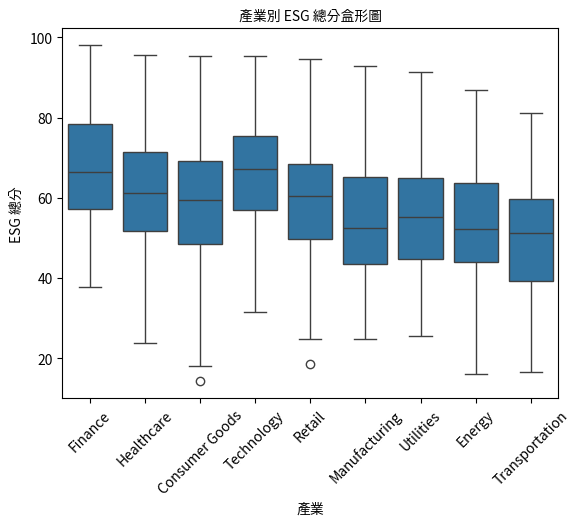

In [ ]:
#測試
import seaborn as sns

ax = sns.boxplot(x="Industry", y="ESG_Overall", data=Company_ESG)
ax.set_title("產業別 ESG 總分盒形圖", fontproperties=custom_font)
ax.set_xlabel("產業", fontproperties=custom_font)
ax.set_ylabel("ESG 總分", fontproperties=custom_font)
plt.xticks(rotation=45, fontproperties=custom_font)
plt.yticks(fontproperties=custom_font)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

1. ESG_Environmental 的直方圖

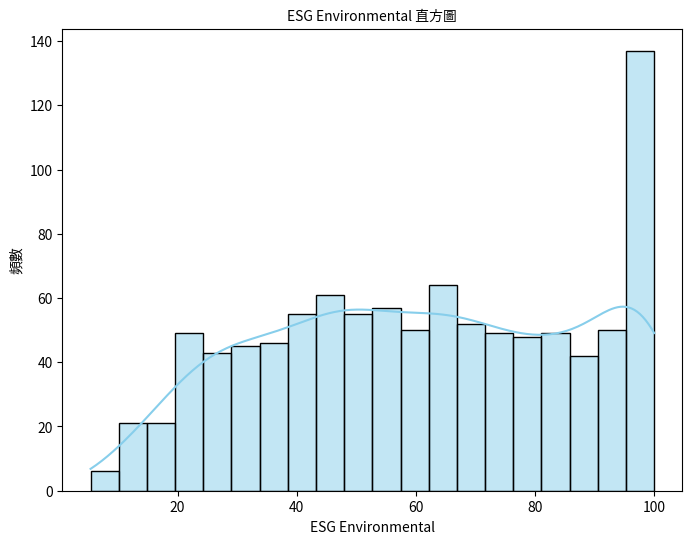

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(Company_ESG["ESG_Environmental"], kde=True, color="skyblue", bins=20)
plt.title("ESG Environmental 直方圖", fontproperties=custom_font)
plt.xlabel("ESG Environmental", fontproperties=custom_font)
plt.ylabel("頻數", fontproperties=custom_font)
plt.show()


2. 以「Industry」為分組依據，ESG_Overall 的盒形圖

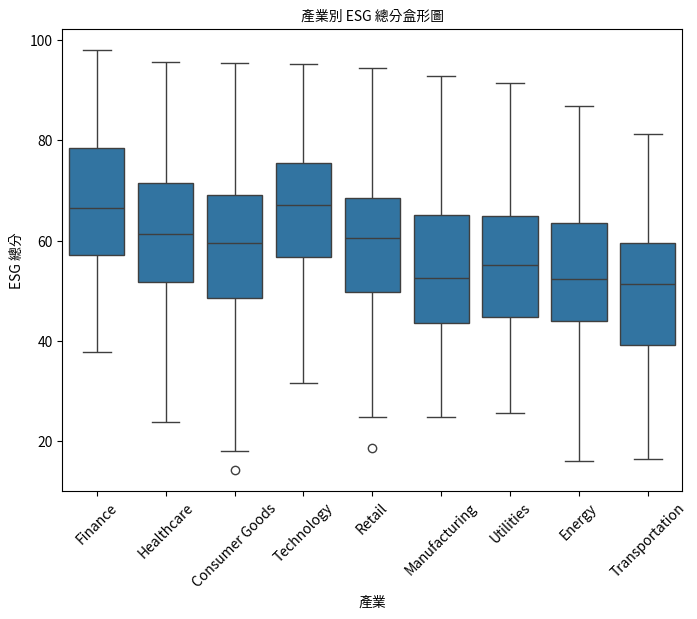

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="Industry", y="ESG_Overall", data=Company_ESG)
ax.set_title("產業別 ESG 總分盒形圖", fontproperties=custom_font)
ax.set_xlabel("產業", fontproperties=custom_font)
ax.set_ylabel("ESG 總分", fontproperties=custom_font)
plt.xticks(rotation=45, fontproperties=custom_font)
plt.yticks(fontproperties=custom_font)
plt.show()


3. 以「ESG成績分組」資料筆數的圓餅圖

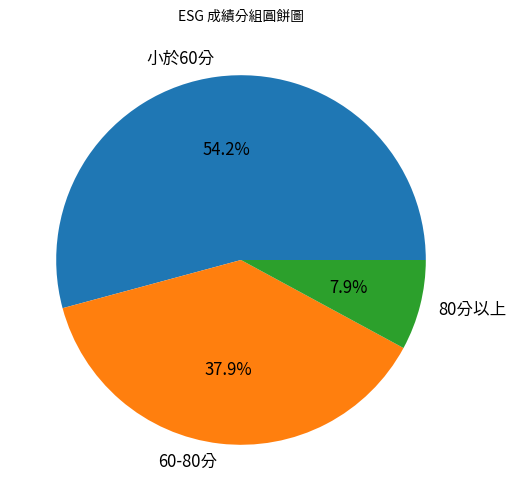

In [ ]:
group_counts = Company_ESG["ESG成績分組"].value_counts()

group_counts.plot.pie(
    autopct="%.1f%%",
    figsize=(6, 6),
    title="ESG 成績分組比例",
    fontsize=12
)
plt.title("ESG 成績分組圓餅圖", fontproperties=custom_font)
plt.ylabel("")
plt.show()


4. 「Revenue」及「EnergyConsumption」兩變數的散佈圖

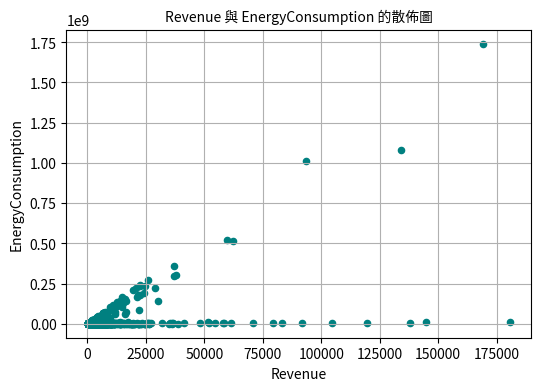

In [ ]:
Company_ESG.plot.scatter(
    x="Revenue",
    y="EnergyConsumption",
    color="teal",
    figsize=(6, 4)
)
plt.title("Revenue 與 EnergyConsumption 的散佈圖", fontproperties=custom_font)
plt.xlabel("Revenue", fontproperties=custom_font)
plt.ylabel("EnergyConsumption", fontproperties=custom_font)
plt.grid(True)
plt.show()
